In [1]:
#importing libraries 
import pandas as pd  # pandas library used for reaading dataset
import numpy as np   # for performing mathmetical opeation
import matplotlib.pyplot as plt #ploting charts
import seaborn as sns #ploting charts

In [2]:
fifa19=pd.read_csv('fifa_eda.csv') # reading data set which is in csv format

In [3]:
fifa19 #dataframe

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [4]:
fifa19.shape # Rows and columns number

(18207, 18)

In [5]:
fifa19.info() #informtion of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [6]:
fifa19.isnull().sum() # total sum of null values

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [7]:
fifa19_cleaned=fifa19.dropna(subset=['Club', 'Value', 'Contract Valid Until'],inplace=True)
fifa19.isnull().sum()             #droping the null values

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [8]:
fifa19.rename(columns={ 'Preferred Foot':'Preferred_Foot','International Reputation': 'International_Reputation',
                       'Skill Moves':'Skill_Moves', 
                       'Contract Valid Until': 'Contract_Valid_Until','Release Clause':'Release_Clause'},
              inplace=True) #changing the column names

In [9]:
fifa19.columns.to_list() # printing column names to list

['ID',
 'Name',
 'Age',
 'Nationality',
 'Overall',
 'Potential',
 'Club',
 'Value',
 'Wage',
 'Preferred_Foot',
 'International_Reputation',
 'Skill_Moves',
 'Position',
 'Joined',
 'Contract_Valid_Until',
 'Height',
 'Weight',
 'Release_Clause']

In [10]:
Top10_Club=fifa19.groupby('Nationality')['Club'].size().rename('Count').reset_index() # Top10 clubs by nationality
Top10_Club=Top10_Club.sort_values(by='Count',ascending=False).head(10)

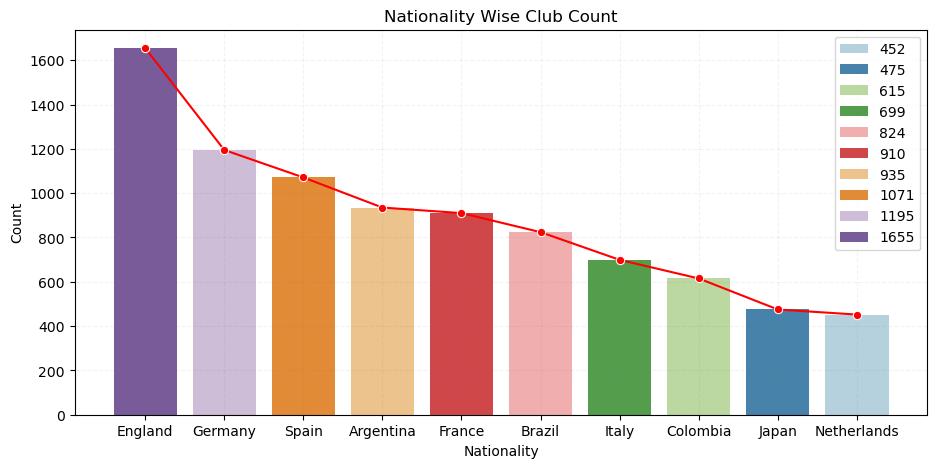

In [11]:
plt.figure(figsize=(11,5)) #f igure size
palette=sns.color_palette("Paired",10) # color pallate used 
sns.barplot(x=Top10_Club['Nationality'],y=Top10_Club['Count'],hue=Top10_Club['Count'].rename('Frequency'),palette=palette,alpha=0.9)
# using seaborn plotting barplot
plt.title('Nationality Wise Club Count') #title of the chart
plt.grid(True, linestyle='--', alpha=0.1,color='grey') #grid lines
sns.lineplot(x=Top10_Club['Nationality'],y=Top10_Club['Count'],color='red',marker='o') #combining 2 charts line and bar
plt.show() #printing the chart

In [12]:
playerseng=fifa19[fifa19['Nationality']=='England']

In [13]:
Engplayers=playerseng.groupby('Club')['Name'].size().rename('count_of_player').reset_index()
Top10ClubEng=Engplayers.sort_values(by='count_of_player',ascending=False).head(10)

In [14]:
Top10ClubEng

,Club,count_of_player
117,Shrewsbury,24
134,Tranmere Rovers,24
102,Portsmouth,24
10,Bolton Wanderers,23
100,Port Vale,23
94,Oxford United,23
0,AFC Wimbledon,23
139,Walsall,22
22,Burton Albion,22
13,Bournemouth,22


In [15]:
Average_age_of_Players_nationality=fifa19.groupby('Nationality')['Age'].mean().rename('Average_Age').reset_index()
Average_age_of_Players_nationality['Average_Age']=Average_age_of_Players_nationality['Average_Age'].astype(int)
NAC=Average_age_of_Players_nationality.sort_values(by='Average_Age',ascending=False).head(5)
NAB=Average_age_of_Players_nationality.sort_values(by='Average_Age',ascending=True).head(5)
LAH=pd.concat([NAC, NAB])
# concating data of most average and least averge ages

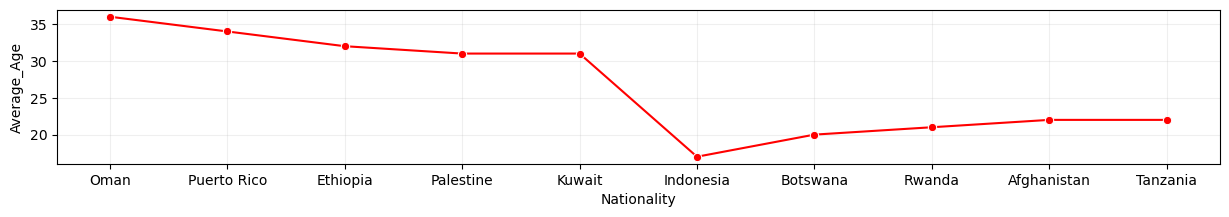

In [16]:
plt.figure(figsize=(15,2))
sns.lineplot(data=LAH,x=LAH['Nationality'],y=LAH['Average_Age'],color='red',marker='o')
plt.grid(alpha=0.2)
plt.show()

In [17]:
LAH

,Nationality,Average_Age
115,Oman,36
123,Puerto Rico,34
50,Ethiopia,32
116,Palestine,31
87,Kuwait,31
73,Indonesia,17
19,Botswana,20
128,Rwanda,21
0,Afghanistan,22
147,Tanzania,22


In [18]:
fifa19.Overall.mean()

66.23957111744011

In [19]:
FcBarcelona=fifa19[fifa19['Club']=='FC Barcelona'].head(10)

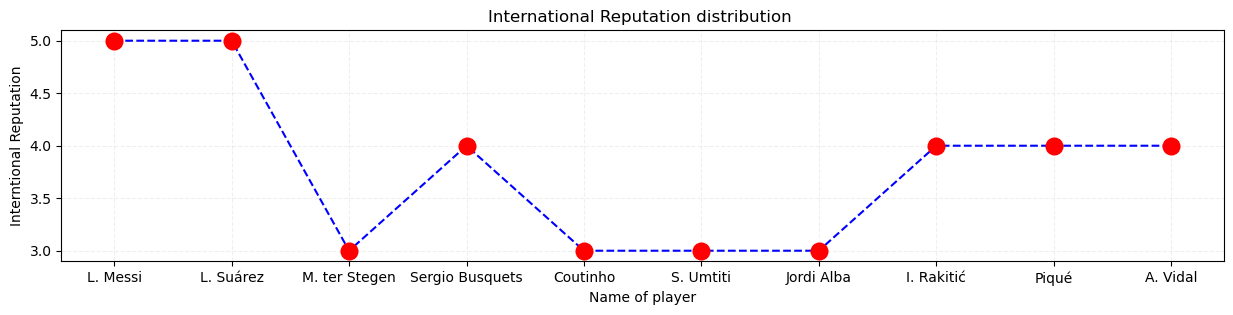

In [20]:
plt.figure(figsize=(15,3))
sns.stripplot(data=FcBarcelona,x=FcBarcelona['Name'],y=FcBarcelona['International_Reputation'],size=13,color='red')
plt.xlabel('Name of player')
plt.ylabel('Interntional Reputation')
plt.title('International Reputation distribution ')
sns.lineplot(x=FcBarcelona['Name'],y=FcBarcelona['International_Reputation'],color='blue',linestyle='--')
plt.grid(True,linestyle='--',alpha=0.2)
plt.show()
# combining 2 chart stripplot and line plot

In [21]:
Players_count=fifa19.groupby('Joined')['Name'].size().rename('Players_joined').reset_index()

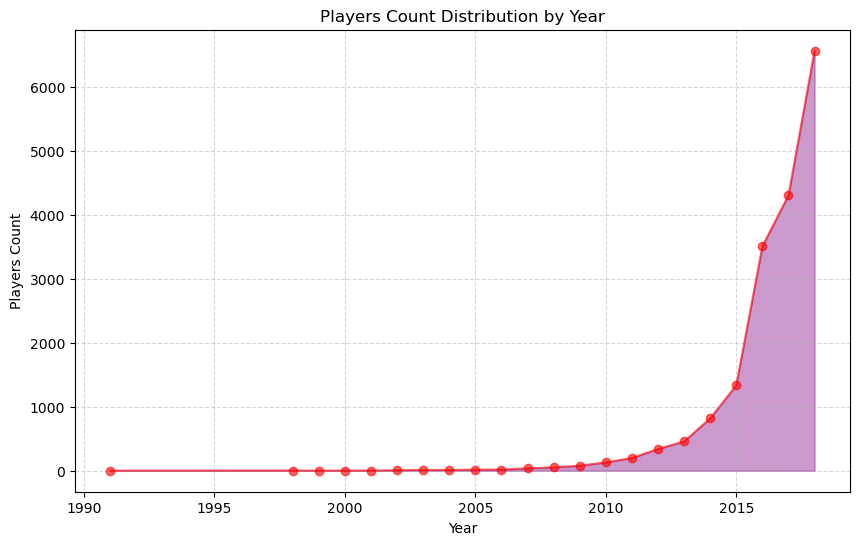

In [22]:
numberofplayersjoined=Players_count.sort_values(by='Players_joined',ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.fill_between(Players_count['Joined'], Players_count['Players_joined'], color='purple', alpha=0.4)
plt.plot(Players_count['Joined'], Players_count['Players_joined'], marker='o',color='red', alpha=0.6)
plt.title('Players Count Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Players Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
# combining 2 charts line and area to plot players joined over year [decade]

In [23]:
count_foot=fifa19.groupby('Preferred_Foot')['Preferred_Foot'].value_counts().rename('Playercount').reset_index()

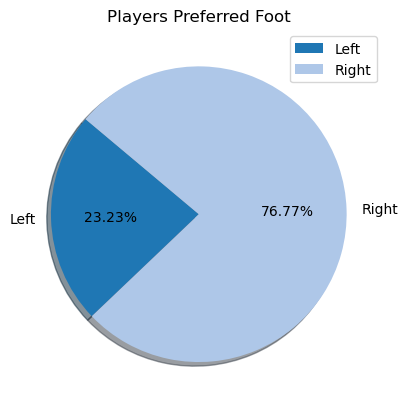

In [24]:
plt.pie(count_foot['Playercount'],labels=count_foot['Preferred_Foot'],autopct="%1.2f%%",startangle=140,shadow=True,colors=plt.get_cmap('tab20').colors)
plt.title('Players Preferred Foot')
plt.legend()
plt.show()
# plotting pie chart for left and right foot 

In [25]:
Top10_HighPaid_Players=fifa19.sort_values(by='Wage',ascending=False)[['Name','Wage']].head(10)

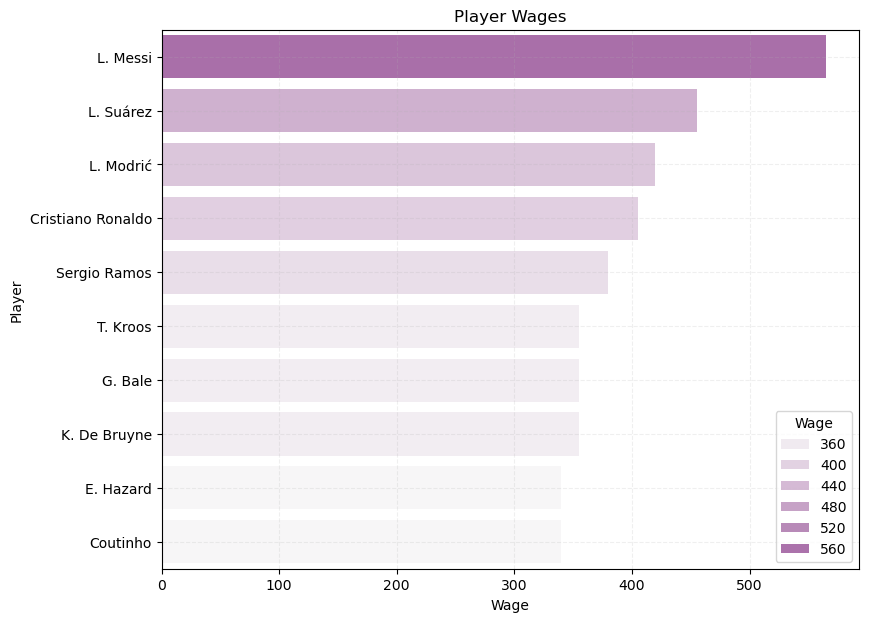

In [26]:
Top10_HighPaid_Players
plt.figure(figsize=(9,7))
sns.barplot(x='Wage', y='Name', data=Top10_HighPaid_Players,palette='light:purple',hue='Wage',alpha=0.6)
plt.title('Player Wages')
plt.xlabel('Wage')
plt.ylabel('Player')
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()
# hoizontal bar plot based on wages payed

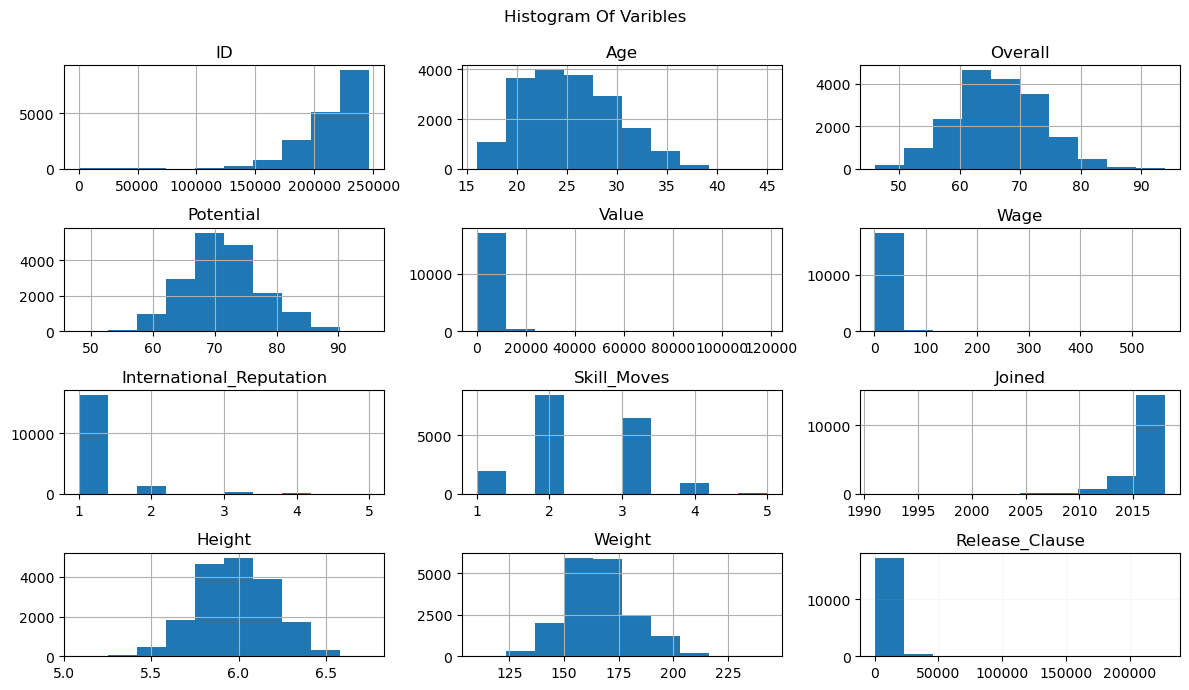

In [27]:
fifa19.hist(figsize=(12, 7))
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
 
plt.suptitle('Histogram Of Varibles')
plt.grid(True,alpha=0.1)
plt.show()
# histogram for vaious element in dataset

In [29]:
corr_age_wage = fifa19[['Age','Wage']].corr()
print(corr_age_wage)
corr_hieght_skill_moves=fifa19[['Height','Skill_Moves']].corr()
print(corr_hieght_skill_moves)
# correleation between age wage and height skill moves

           Age      Wage
Age   1.000000  0.145075
Wage  0.145075  1.000000
              Height  Skill_Moves
Height       1.00000     -0.42244
Skill_Moves -0.42244      1.00000


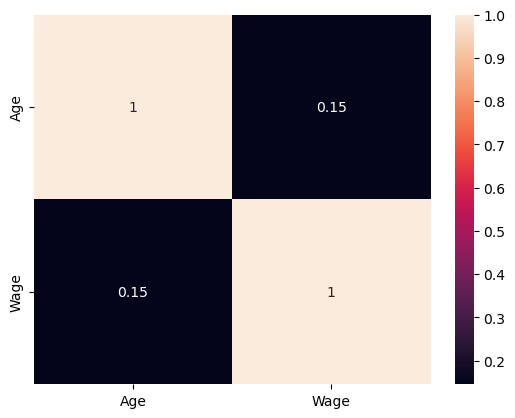

In [32]:
sns.heatmap(corr_age_wage,annot=True)
plt.show()
# plotting heatmap fo age and wage

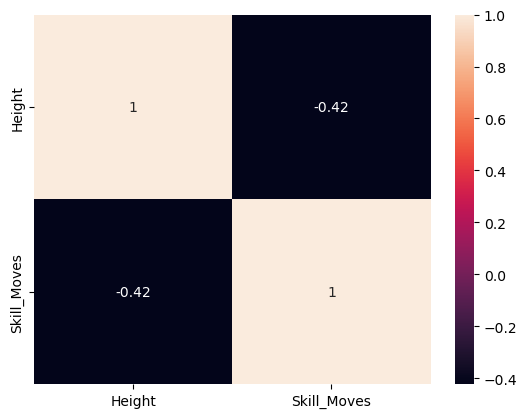

In [33]:
sns.heatmap(corr_hieght_skill_moves,annot=True)
plt.show()
# plotting heatmap between height and skill moves

In [34]:
positioncount=fifa19['Position'].value_counts().rename('count').reset_index()

In [35]:
positioncount

,Position,count
0,ST,2130
1,GK,1989
2,CB,1751
3,CM,1377
4,LB,1304
5,RB,1268
6,RM,1114
7,LM,1086
8,CAM,946
9,CDM,936


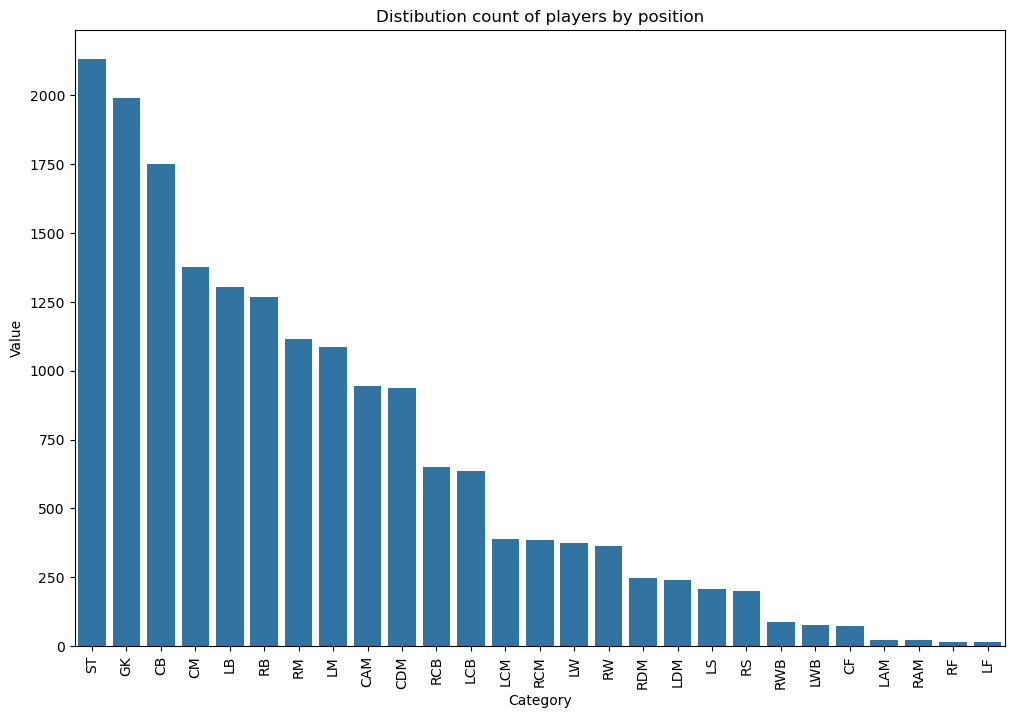

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Position', y='count',data=positioncount)
plt.title('Distibution count of players by position')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate labels 90
plt.show()
# Plotting bar chart between position and the count 